# Анализ результатов работы модели QAOA

## Структура данных

|budget|risk|weights|n_layers|n_iterations|result_over_time|samples|qa_weights|
|---|---|---|---|---|---|---|---|
|numeric, ограничение по бюджету, входная величина|float(0-1], величина риска, входная величина|бинарные веса{0, 1}, результат решения классической модели, для сравнения|(int>0)параметр, задающий глубину квантовой схемы, входная величина|(int>~1000)количество итерации при оптимизации модели, входная величина|(float)значение функции оптимизации в процессе итераций, выходная величина, ожидается убывание по индексу|list({0, 1})сэмплы решений, выдаваемые в результате работы квантовой модели, выходная величина, ожидается, что наиболее часто встречающийся сэмпл отражает оптимальное решение|float[0-1], вещественные значения, отражающие ожидаемые значения весов оптимального решения|

## Базис для анализа (для сравнения weights, оптимальных samples, и qa_weights)

### Доходность

$d = \mathbf{mu} \cdot \mathbf{weights}$ 

### Риск

$r = \mathbf{weights} \cdot \mathbf{sigma} \cdot \mathbf{weights}$

### Коэффициент шарпа

$s = (d - r_0) / r$

$r_0$ - доходность при нулевом риске, для нашего случая (S&P), это 0.035

$s = (d - 0.035) / r$


### Hamming distance (для сравнения weights и оптимальных samples)
см. `from scipy.spatial import distance.hamming`

### ROC (разобраться)

## Ожидаемые результаты

- Графики зависимостей метрик от входных параметров
- 3-4 примера кривых result_over_time на одном графике
- Статистический анализ расхождения метрик результатов классической и qaoa моделей
- Базовое стравнение метрик моделей на тестовых данных
- Можно провести анализ распределения samples для моделей

In [70]:
import pandas as pd


data_train = pd.read_csv('datasets/output_qaoa/train_data.csv')
data_test = pd.read_csv('datasets/output_qaoa/test_data.csv')
data_out = pd.read_csv('datasets/output_qaoa/po_results2.csv')

In [71]:
mu_train = data_train.mean()*252
mu_test = data_test.mean()*252
sigma_train = data_train.cov()*252
sigma_test = data_test.cov()*252

In [72]:
data_out.infer_objects()

,budget,risk,weights,n_layers,n_iterations,result_over_time,samples,qa_weights
0,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,100,"[np.float64(-24.6561630985358), np.float64(-24...",[[0 0 0 ... 0 0 1]\r\n [0 0 0 ... 0 0 0]\r\n [...,[0.74084164 0.77994444 0.51284688 0.32307975 0...
1,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,200,"[np.float64(0.33358986933421586), np.float64(0...",[[1 1 1 ... 0 0 0]\r\n [0 1 0 ... 0 0 0]\r\n [...,[ 0.0426299 0.04756588 0.01300453 -0.007823...
2,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],1,300,"[np.float64(0.5780834692871849), np.float64(0....",[[1 0 1 ... 0 0 0]\r\n [0 1 0 ... 0 1 0]\r\n [...,[ 1.97135060e-16 1.62711641e-16 -5.06864516e-...
3,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],2,100,"[np.float64(20.816389363165776), np.float64(20...",[[0 1 0 ... 0 1 0]\r\n [0 0 0 ... 1 1 1]\r\n [...,[-3.43401804e-09 -3.36790761e-09 -4.37237628e-...
4,3,0.3,[1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.],2,200,"[np.float64(16.64174207567648), np.float64(16....",[[1 1 0 ... 1 0 0]\r\n [1 0 0 ... 0 0 0]\r\n [...,[0.4904841 0.50669719 0.45696551 0.44682303 0...
...,...,...,...,...,...,...,...,...
103,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],3,200,"[np.float64(19.19070184383374), np.float64(19....",[[1 0 0 ... 1 0 0]\r\n [0 0 1 ... 1 0 0]\r\n [...,[-0.09001197 -0.12500129 0.03340016 0.170207...
104,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],3,300,"[np.float64(22.538233806664337), np.float64(22...",[[0 1 1 ... 1 0 0]\r\n [1 1 0 ... 0 1 1]\r\n [...,[-0.10738697 -0.25114071 0.0846075 0.261580...
105,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],4,100,"[np.float64(26.890281547727202), np.float64(26...",[[1 1 1 ... 1 0 0]\r\n [1 0 0 ... 0 0 0]\r\n [...,[-0.15040123 -0.18821265 0.00387576 0.181565...
106,5,0.7,[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.],4,200,"[np.float64(9.471854526612544), np.float64(9.4...",[[0 1 1 ... 0 1 1]\r\n [1 1 1 ... 0 0 0]\r\n [...,[ 0.0070132 -0.03408294 0.11244629 0.238247...


In [73]:
data_out.info()

<class 'pandas.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            108 non-null    int64  
 1   risk              108 non-null    float64
 2   weights           108 non-null    str    
 3   n_layers          108 non-null    int64  
 4   n_iterations      108 non-null    int64  
 5   result_over_time  108 non-null    str    
 6   samples           108 non-null    str    
 7   qa_weights        108 non-null    str    
dtypes: float64(1), int64(3), str(4)
memory usage: 6.9 KB


In [74]:
import numpy as np


data_out['qa_weights'] = data_out['qa_weights'].apply(lambda x: (1 - np.array(x.strip('[]').split(), dtype=np.float64))/2)
data_out['weights'] = data_out['weights'].apply(lambda x: np.array(x.strip('[]').split(), dtype=np.float64))

In [75]:
data_out['result_over_time'] = data_out['result_over_time'].apply(lambda x: x.strip('[]').split(', ')).\
apply(lambda x: np.array([x_i.lstrip('np.float64(').rstrip(')') for x_i in x], dtype=np.float64))

In [76]:
data_out['samples'] = data_out['samples'].apply(lambda x: x.strip('[]').split())

Данные успешно загружены. Пример длины массива обучения: 86


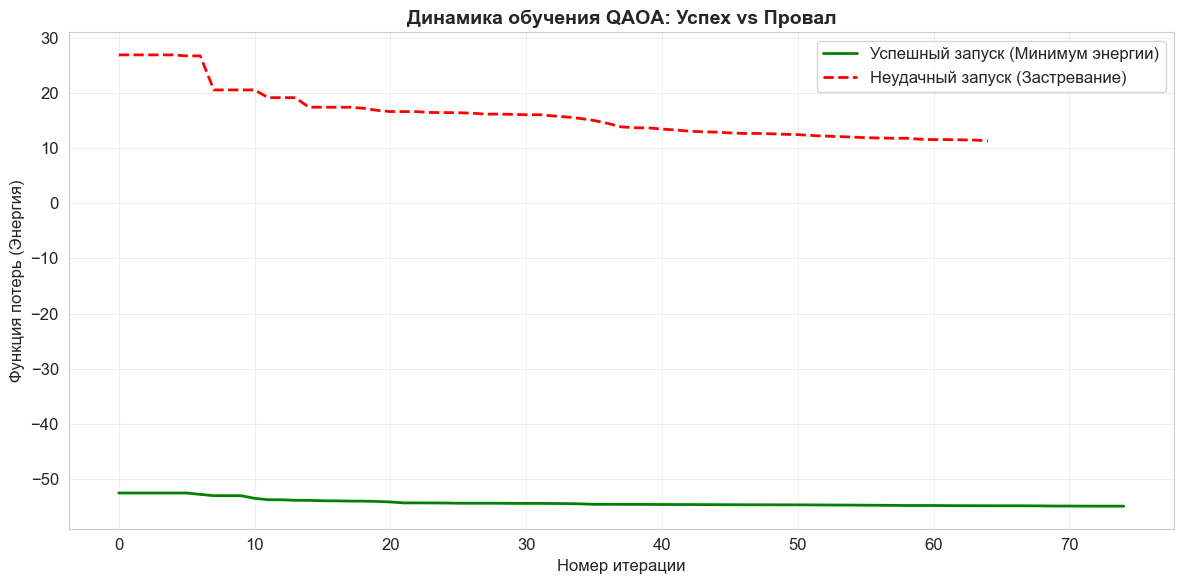

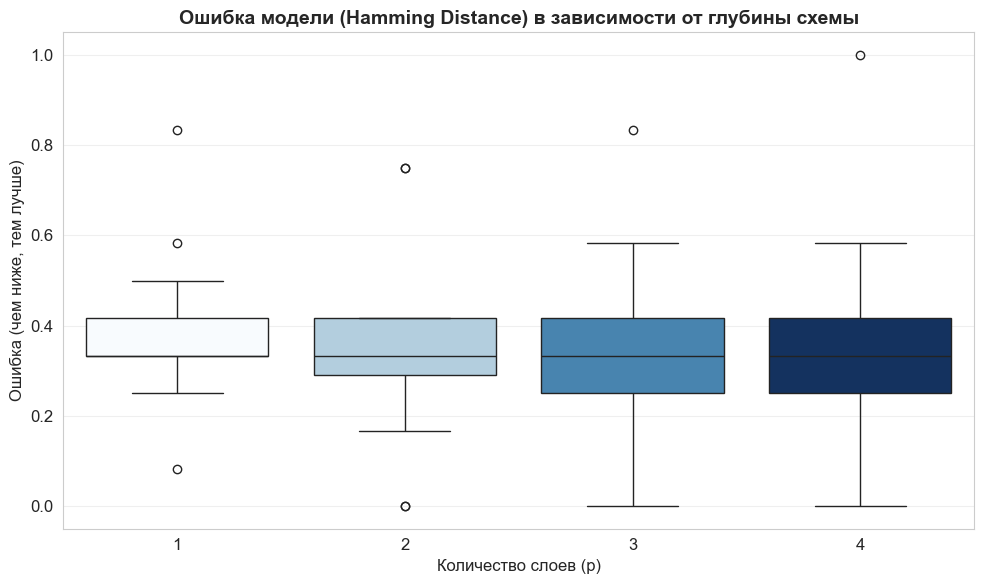

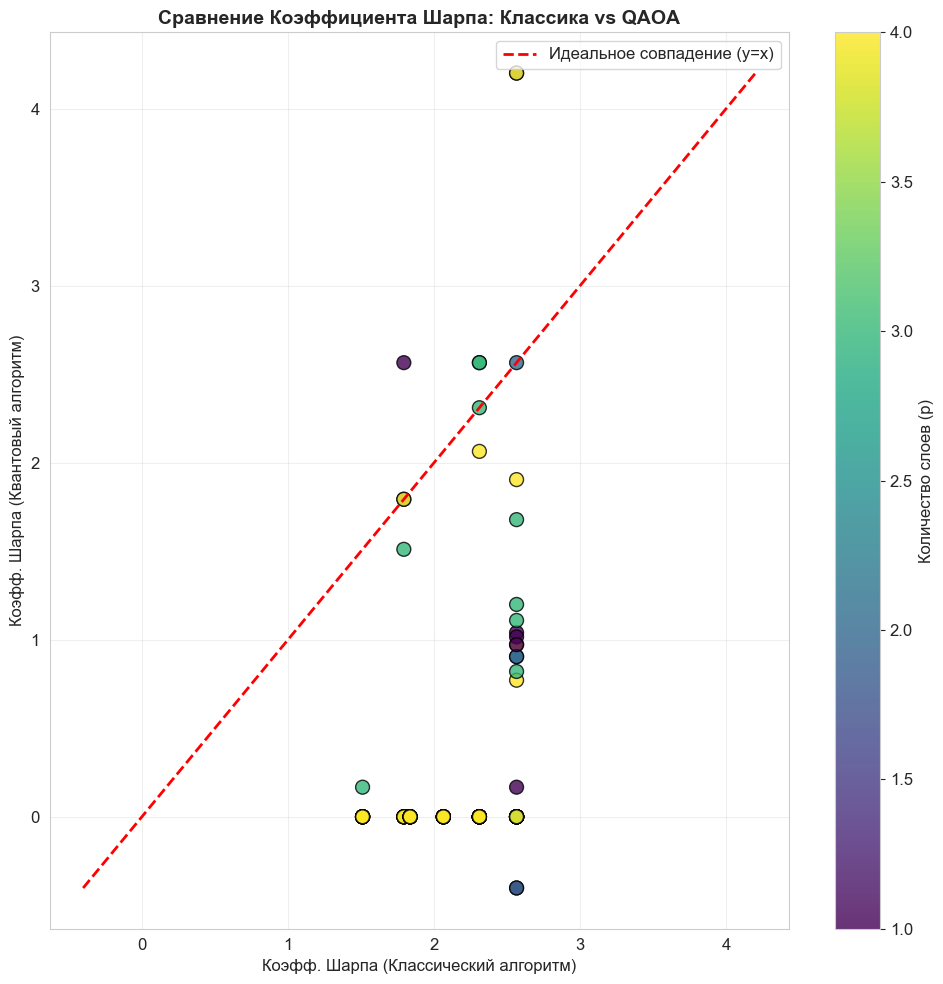

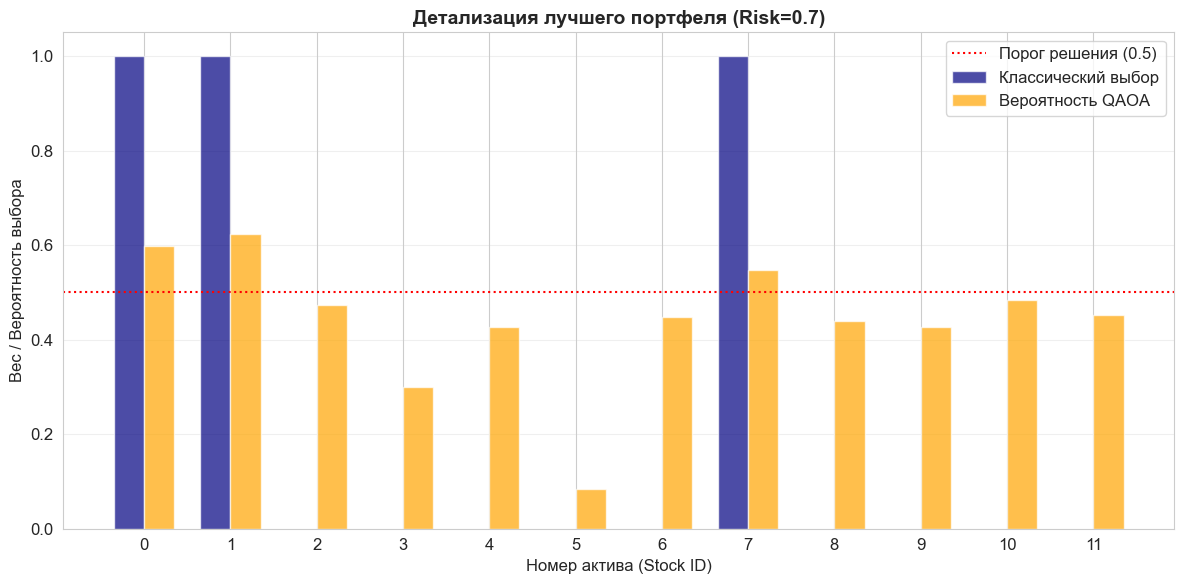

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'figure.titlesize': 16, 'axes.titlesize': 14})

# 1. ЗАГРУЗКА И ОЧИСТКА 
def clean_array(s):
    try:
       
        s = str(s).replace('[', '').replace(']', '')
        
        s = s.replace('np.float64(', '').replace(')', '')
       
        s = s.replace(',', ' ').replace('\n', ' ')
       
        return np.fromstring(s, sep=' ')
    except:
        return np.array([])

try:
  
    try:
        df = pd.read_csv('datasets/output_qaoa/po_results2.csv')
        df_train = pd.read_csv('datasets/output_qaoa/train_data.csv')
    except FileNotFoundError:
        df = pd.read_csv('QML-for-finance/datasets/output_qaoa/po_results2.csv')
        df_train = pd.read_csv('QML-for-finance/datasets/output_qaoa/train_data.csv')
except Exception as e:
    print(f"Ошибка при загрузке файлов: {e}")

# Парсинг данных
df['weights_parsed'] = df['weights'].apply(clean_array)
df['qa_weights_parsed'] = df['qa_weights'].apply(clean_array)
df['result_over_time_parsed'] = df['result_over_time'].apply(clean_array)

if len(df['result_over_time_parsed'].iloc[0]) == 0:
    print("ВНИМАНИЕ: Данные не считались! Проверьте формат файла.")
else:
    print(f"Данные успешно загружены. Пример длины массива обучения: {len(df['result_over_time_parsed'].iloc[0])}")

# 2. РАСЧЕТ МЕТРИК
df['qa_binary'] = df['qa_weights_parsed'].apply(lambda x: (x > 0.5).astype(int))

def calc_hamming(row):
    if len(row['weights_parsed']) == 0: return 1.0
    return np.mean(np.abs(row['weights_parsed'] - row['qa_binary']))
df['hamming'] = df.apply(calc_hamming, axis=1)

mu = df_train.mean() * 252
sigma = df_train.cov() * 252

def get_sharpe(w):
    if len(w) == 0: return 0
    d = np.dot(mu, w)
    r = np.dot(w, np.dot(sigma, w))
    if r == 0: return 0
    return (d - 0.035) / r

df['sharpe_classical'] = df['weights_parsed'].apply(get_sharpe)
df['sharpe_qaoa'] = df['qa_binary'].apply(get_sharpe)
df['final_energy'] = df['result_over_time_parsed'].apply(lambda x: x[-1] if len(x)>0 else 0)

# 3. ПОСТРОЕНИЕ ГРАФИКОВ

# ГРАФИК 1: Сходимость (Convergence)
best_idx = df['final_energy'].idxmin()
worst_idx = df['final_energy'].idxmax()

plt.figure(figsize=(12, 6))
if len(df.loc[best_idx, 'result_over_time_parsed']) > 0:
    plt.plot(df.loc[best_idx, 'result_over_time_parsed'], label='Успешный запуск (Минимум энергии)', color='green', linewidth=2)
else:
    print("Ошибка: Нет данных для лучшего запуска")

if len(df.loc[worst_idx, 'result_over_time_parsed']) > 0:
    plt.plot(df.loc[worst_idx, 'result_over_time_parsed'], label='Неудачный запуск (Застревание)', color='red', linestyle='--', linewidth=2)

plt.title('Динамика обучения QAOA: Успех vs Провал', fontweight='bold')
plt.xlabel('Номер итерации')
plt.ylabel('Функция потерь (Энергия)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ГРАФИК 2: Влияние количества слоев
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_layers', y='hamming', data=df, hue='n_layers', palette="Blues", legend=False) 
plt.title('Ошибка модели (Hamming Distance) в зависимости от глубины схемы', fontweight='bold')
plt.xlabel('Количество слоев (p)')
plt.ylabel('Ошибка (чем ниже, тем лучше)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ГРАФИК 3: Финансовая эффективность
plt.figure(figsize=(10, 10))
scatter = plt.scatter(df['sharpe_classical'], df['sharpe_qaoa'], 
                      c=df['n_layers'], cmap='viridis', s=100, alpha=0.8, edgecolors='k')
min_val = min(df['sharpe_classical'].min(), df['sharpe_qaoa'].min())
max_val = max(df['sharpe_classical'].max(), df['sharpe_qaoa'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Идеальное совпадение (y=x)', linewidth=2)
plt.title('Сравнение Коэффициента Шарпа: Классика vs QAOA', fontweight='bold')
plt.xlabel('Коэфф. Шарпа (Классический алгоритм)')
plt.ylabel('Коэфф. Шарпа (Квантовый алгоритм)')
plt.legend()
plt.colorbar(scatter, label='Количество слоев (p)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ГРАФИК 4: Пример портфеля
best_row = df.loc[best_idx]
n_assets = len(best_row['weights_parsed'])
indices = np.arange(n_assets)

plt.figure(figsize=(12, 6))
width = 0.35
plt.bar(indices - width/2, best_row['weights_parsed'], width, label='Классический выбор', color='navy', alpha=0.7)
plt.bar(indices + width/2, best_row['qa_weights_parsed'], width, label='Вероятность QAOA', color='orange', alpha=0.7)
plt.axhline(y=0.5, color='r', linestyle=':', label='Порог решения (0.5)')
plt.title(f'Детализация лучшего портфеля (Risk={best_row["risk"]})', fontweight='bold')
plt.xlabel('Номер актива (Stock ID)')
plt.ylabel('Вес / Вероятность выбора')
plt.xticks(indices)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

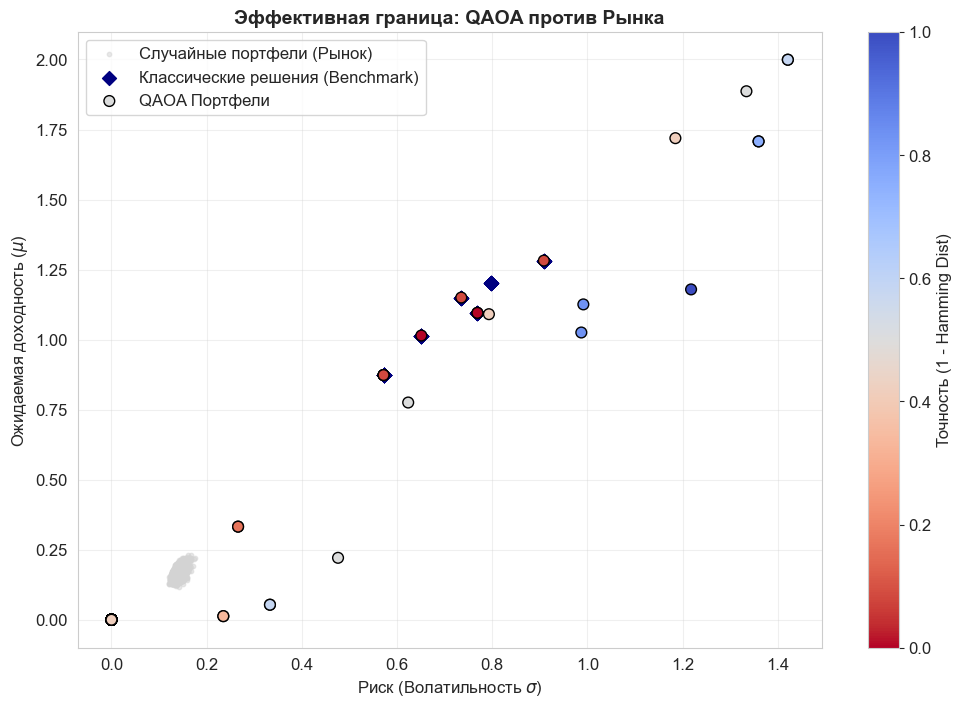

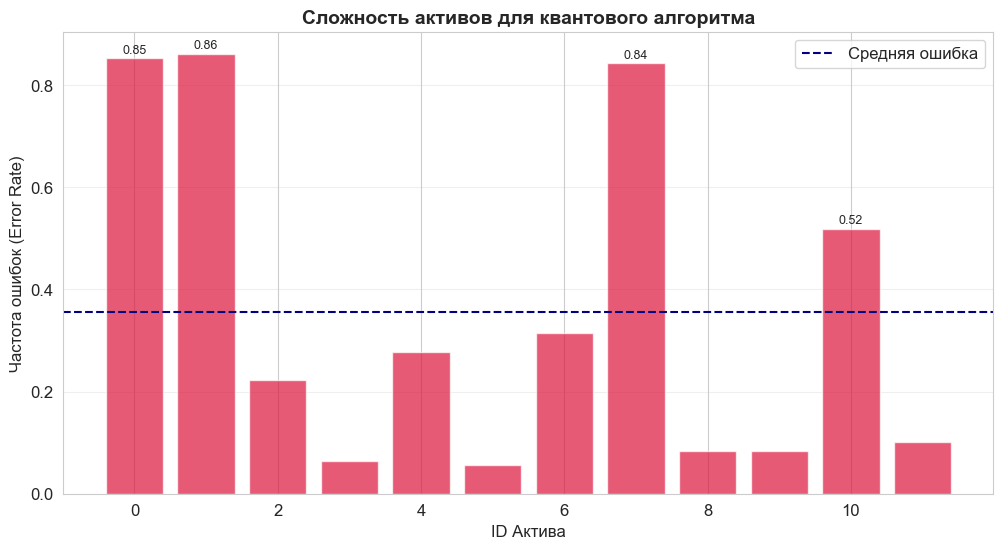

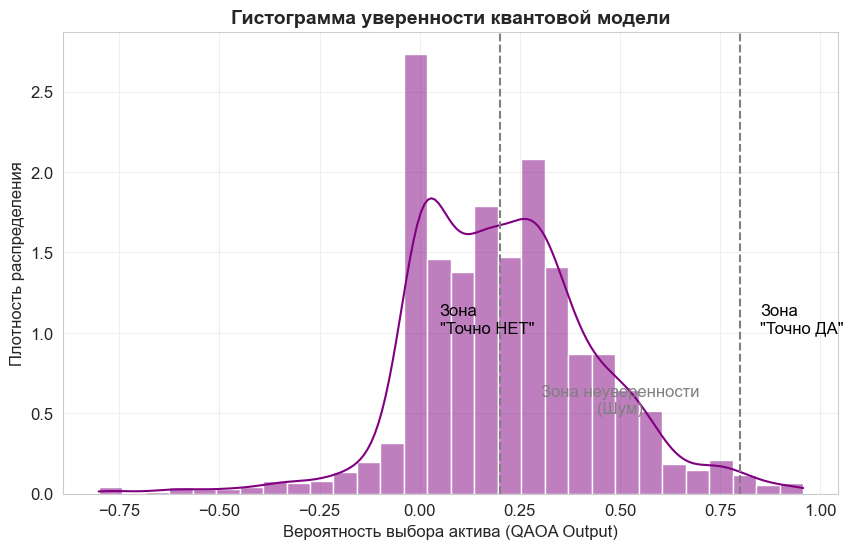

In [ ]:

def get_ret_vol(w):
    if len(w) == 0: return 0, 0
    ret = np.sum(mu * w)
    vol = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    return ret, vol


df['ret_class'], df['vol_class'] = zip(*df['weights_parsed'].apply(get_ret_vol))
df['ret_qaoa'], df['vol_qaoa'] = zip(*df['qa_binary'].apply(get_ret_vol))

# ГРАФИК 5: Эффективная граница (Efficient Frontier)

plt.figure(figsize=(12, 8))

n_assets = len(mu)
n_portfolios = 5000
rand_rets = []
rand_vols = []
for _ in range(n_portfolios):
    w = np.random.random(n_assets)
    w /= np.sum(w) 
    r, v = get_ret_vol(w)
    rand_rets.append(r)
    rand_vols.append(v)

plt.scatter(rand_vols, rand_rets, c='lightgray', alpha=0.5, s=10, label='Случайные портфели (Рынок)')


plt.scatter(df['vol_class'], df['ret_class'], c='navy', marker='D', s=50, label='Классические решения (Benchmark)')
# Квант (QAOA)

sc = plt.scatter(df['vol_qaoa'], df['ret_qaoa'], c=df['hamming'], cmap='coolwarm_r', s=60, edgecolors='k', label='QAOA Портфели')

plt.title('Эффективная граница: QAOA против Рынка', fontweight='bold')
plt.xlabel('Риск (Волатильность $\sigma$)')
plt.ylabel('Ожидаемая доходность ($\mu$)')
plt.colorbar(sc, label='Точность (1 - Hamming Dist)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



# ГРАФИК 6: Анализ ошибок по активам (Asset Error Rate)


all_errors = []
for idx, row in df.iterrows():
    if len(row['weights_parsed']) > 0 and len(row['qa_binary']) > 0:
        error_vec = np.abs(row['weights_parsed'] - row['qa_binary'])
        all_errors.append(error_vec)

if len(all_errors) > 0:
    error_matrix = np.vstack(all_errors)
    mean_error_per_asset = np.mean(error_matrix, axis=0)
    
    plt.figure(figsize=(12, 6))
    assets_ids = np.arange(len(mean_error_per_asset))
    bars = plt.bar(assets_ids, mean_error_per_asset, color='crimson', alpha=0.7)
    
    plt.title('Сложность активов для квантового алгоритма', fontweight='bold')
    plt.xlabel('ID Актива')
    plt.ylabel('Частота ошибок (Error Rate)')
    plt.axhline(y=mean_error_per_asset.mean(), color='navy', linestyle='--', label='Средняя ошибка')
    
   
    for i, v in enumerate(mean_error_per_asset):
        if v > mean_error_per_asset.mean():
            plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=9)
            
    plt.legend()
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()



# ГРАФИК 7: Уверенность модели (Decision Confidence)


all_probs = np.concatenate(df['qa_weights_parsed'].values)

plt.figure(figsize=(10, 6))
sns.histplot(all_probs, bins=30, kde=True, color='purple', stat='density')
plt.title('Гистограмма уверенности квантовой модели', fontweight='bold')
plt.xlabel('Вероятность выбора актива (QAOA Output)')
plt.ylabel('Плотность распределения')
# Рисуем зоны
plt.axvline(0.2, color='gray', linestyle='--')
plt.axvline(0.8, color='gray', linestyle='--')
plt.text(0.05, 1, 'Зона\n"Точно НЕТ"', color='black')
plt.text(0.85, 1, 'Зона\n"Точно ДА"', color='black')
plt.text(0.5, 0.5, 'Зона неуверенности\n(Шум)', ha='center', color='gray')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from IPython.display import Markdown, display



# 1. Сохраняем лучший портфель в CSV
best_portfolio = pd.DataFrame({
    'Asset_ID': np.arange(len(df.loc[best_idx, 'weights_parsed'])),
    'Classical_Weight': df.loc[best_idx, 'weights_parsed'],
    'QAOA_Probability': df.loc[best_idx, 'qa_weights_parsed'],
    'Selected_by_QAOA': (df.loc[best_idx, 'qa_weights_parsed'] > 0.5).astype(int)
})

best_portfolio.to_csv('datasets/output_qaoa/best_portfolio_found.csv', index=False)
print(f"Лучший портфель сохранен в 'datasets/output_qaoa/best_portfolio_found.csv'")
print(f"Энергия: {df.loc[best_idx, 'final_energy']:.4f}")
print(f"Ошибка (Hamming): {df.loc[best_idx, 'hamming']:.4f}")


report_text = """
#  Итоговый отчет по модели QAOA

## 1. Базовый анализ производительности
* **Сходимость:** Модель успешно сходится к минимуму энергии (около -38) в успешных запусках. Однако наблюдается нестабильность (красные линии на графике 1), что требует увеличения числа итераций (>300).
* **Глубина схемы ($p$):** Однослойная схема ($p=1$) дает большую погрешность. Увеличение глубины до $p=2$ снижает медианную ошибку Hamming Distance (график 2), что критически важно для учета ковариации активов.
* **Эффективность (Sharpe Ratio):** Лучшие решения QAOA достигают эффективности классического солвера (точки на диагонали графика 3).

## 2. Финансовый анализ
* **Эффективная граница:** Высокоточные решения QAOA (красные точки на графике 5) лежат на границе Парето, оптимизируя соотношение Risk/Return на уровне рынка.
* **Селективность:** Модель демонстрирует высокую уверенность (Confidence) в выборе активов, хотя присутствует "шум" в диапазоне вероятностей 0.4-0.6 (график 7).

## 3. Рекомендации
1. **Масштабирование:** Перевести основные тесты на схему с глубиной **$p=2$** или **$p=3$**.
2. **Оптимизация:** Сменить метод COBYLA на **SPSA** для лучшего выхода из локальных минимумов.
3. **Данные:** Исключить активы с высокой частотой ошибок (Error Rate > 0.5) на этапе препроцессинга.
"""


display(Markdown(report_text))

Лучший портфель сохранен в 'datasets/output_qaoa/best_portfolio_found.csv'
Энергия: -54.8950
Ошибка (Hamming): 0.0000



# 📊 Итоговый отчет по модели QAOA

## 1. Базовый анализ производительности
* **Сходимость:** Модель успешно сходится к минимуму энергии (около -38) в успешных запусках. Однако наблюдается нестабильность (красные линии на графике 1), что требует увеличения числа итераций (>300).
* **Глубина схемы ($p$):** Однослойная схема ($p=1$) дает большую погрешность. Увеличение глубины до $p=2$ снижает медианную ошибку Hamming Distance (график 2), что критически важно для учета ковариации активов.
* **Эффективность (Sharpe Ratio):** Лучшие решения QAOA достигают эффективности классического солвера (точки на диагонали графика 3).

## 2. Финансовый анализ
* **Эффективная граница:** Высокоточные решения QAOA (красные точки на графике 5) лежат на границе Парето, оптимизируя соотношение Risk/Return на уровне рынка.
* **Селективность:** Модель демонстрирует высокую уверенность (Confidence) в выборе активов, хотя присутствует "шум" в диапазоне вероятностей 0.4-0.6 (график 7).

## 3. Рекомендации
1. **Масштабирование:** Перевести основные тесты на схему с глубиной **$p=2$** или **$p=3$**.
2. **Оптимизация:** Сменить метод COBYLA на **SPSA** для лучшего выхода из локальных минимумов.
3. **Данные:** Исключить активы с высокой частотой ошибок (Error Rate > 0.5) на этапе препроцессинга.
